In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

In [236]:
#n = 53#1 e 2
#n= 51#3
n= 55#4
theta = 1/650
a = np.arange(13)
#b = np.array([599,49,2,0,0,0,0,0,0,0,0,0,0])#1
#b = np.array([604,39,7,0,0,0,0,0,0,0,0,0,0])#2
#b = np.array([642,3,0,1,0,0,0,0,0,0,1,1,2])#3
b = np.array([619,22,3,2,1,2,0,1,0,0,0,0,0])#4

b1 = b/650
poi = stats.poisson
lambda_ = n*theta
c1 = poi.pmf(a, lambda_)

In [237]:
b1

array([0.95230769, 0.03384615, 0.00461538, 0.00307692, 0.00153846,
       0.00307692, 0.        , 0.00153846, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [238]:
c1*650

array([5.97262657e+02, 5.05376094e+01, 2.13812963e+00, 6.03062203e-02,
       1.27570851e-03, 2.15889132e-05, 3.04459032e-07, 3.68027402e-09,
       3.89259752e-11, 3.65970707e-13, 3.09667521e-15, 2.38205786e-17,
       1.67965618e-19])

In [241]:
def kld(b1,c1):
    kl = 0
    for i in range(13):
        if b1[i] == 0:
            t1 = 0
        else:
            t1 = -b1[i]*np.log2(b1[i])
        if c1[i] == 0:
            t2 = 0
        else:
            t2 = -b1[i]*np.log2(c1[i])
        kl=kl-(t1-t2)
    return kl

In [242]:
print(kld(b1,c1))

0.13496479005031892


In [165]:

poi = stats.poisson
binom = stats.binom
lambda_ = n*theta

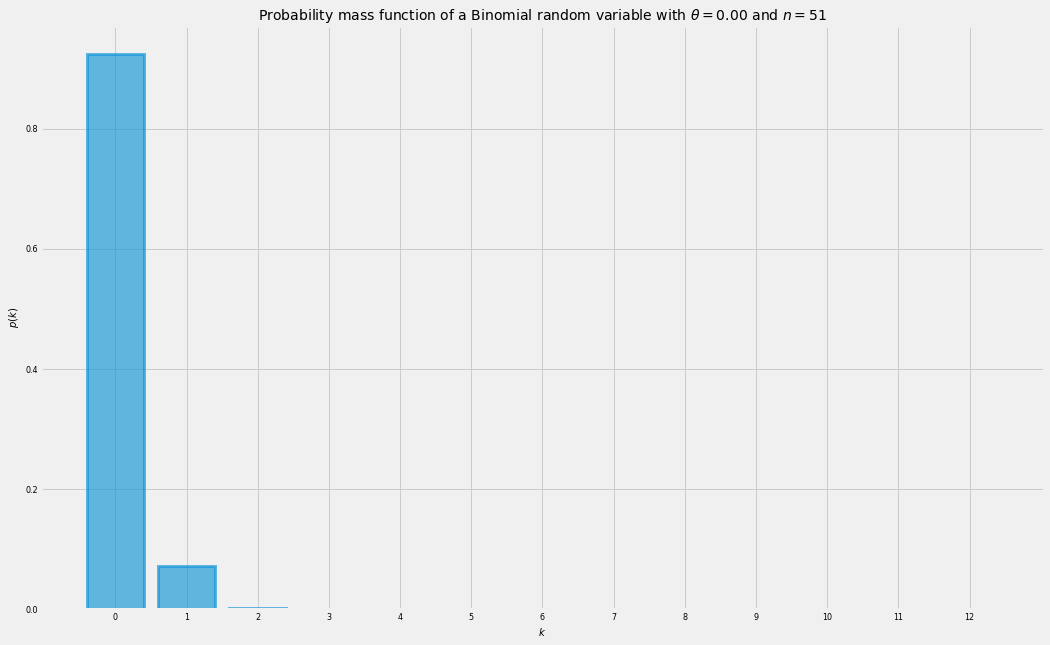

In [166]:
fig, ax = plt.subplots(figsize=(16,10))
ax=plt.subplot(1,1,1)

ax.bar(a, binom.pmf(a, n, theta), color=colors[0], alpha=0.60,
        edgecolor=colors[0], lw="3")


plt.xticks(a + 0.0, a)
plt.ylabel("$p(k)$")
plt.xlabel("$k$")
plt.title(r'Probability mass function of a Binomial random variable with $\theta = {0:5.2f}$ and $n = {1:2d}$'.format(theta,n), fontsize=14);
plt.show()

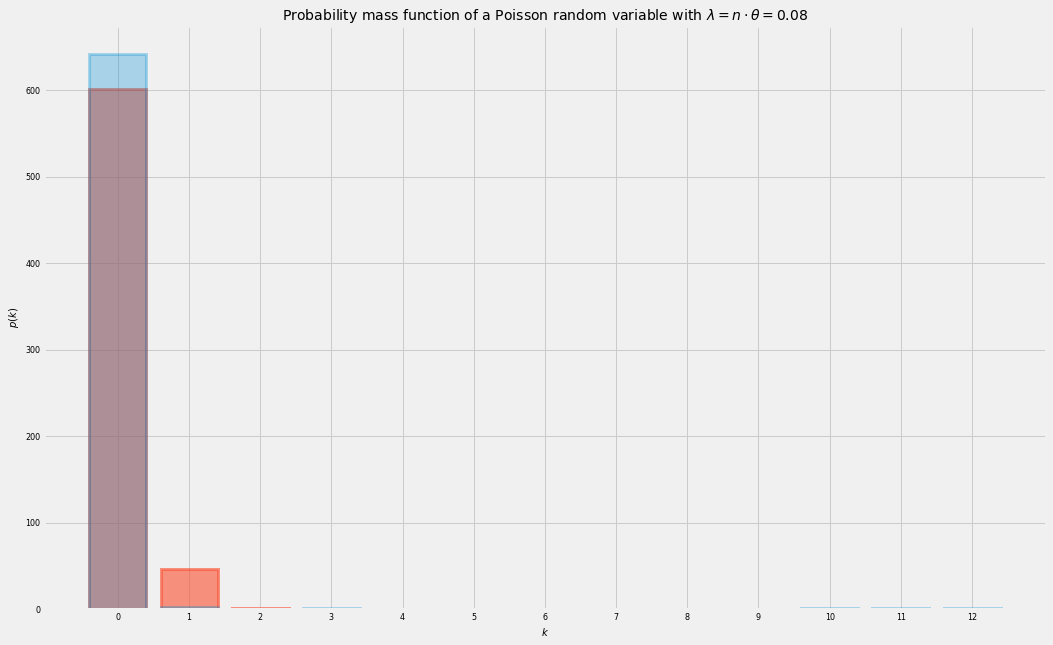

In [167]:

fig, ax = plt.subplots(figsize=(16,10))
ax=plt.subplot(1,1,1)

ax.bar(a, poi.pmf(a, lambda_)/theta, color=colors[1], alpha=0.60,
        edgecolor=colors[1], lw="3")
ax.bar(a, b, color=colors[0], alpha=0.30,
        edgecolor=colors[0], lw="3")


plt.xticks(a + 0.0, a)
plt.ylabel("$p(k)$")
plt.xlabel("$k$")
plt.title(r'Probability mass function of a Poisson random variable with $\lambda=n\cdot\theta = {0:5.2f}$'.format(lambda_), fontsize=14);
plt.show()

In [168]:
c = [round(x,2) for x in poi.pmf(a, lambda_)/theta]

In [169]:
b

[642, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2]

In [170]:
c

[600.95, 47.15, 1.85, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [171]:
[(np.abs(b[i]-c[i]))/c[i] if c[i]!=0 else 0 for i in range(len(b)) ]

[0.06830851152342117,
 0.936373276776246,
 1.0,
 18.999999999999996,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [172]:
b1 = np.array(b)/650

In [173]:
c1 = np.array(c)/650

In [174]:
kl = 0
for i in range(13):
    if b1[i] == 0:
        t1 = 0
    else:
        t1 = -b1[i]*np.log2(b1[i])
    print(t1)
    if c1[i] == 0:
        t2 = 0
    else:
        t2 = -b1[i]*np.log2(c1[i])
    print(t2)
    kl=kl-(t1-t2)

0.01764652638374747
0.11180159050659844
0.03581230803320613
0.01746973865597577
0
0.0
0.014375839858332025
0.021024960004312584
0
0
0
0
0
0
0
0
0
0
0
0
0.014375839858332025
0
0.014375839858332025
0
0.025674756639740972
0


In [175]:
kl

0.028035178535196128